## Descrição do projeto 

In [ ]:
# Importação das bibliotecas

import datetime
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Obtenção dos dados

In [ ]:
df = pd.read_csv(r'C:\Users\Jp Lima\Desktop\Use-of-force-classifier\Use-of-force-classifier\data\external\dataset.csv')

**Dicionário de variáveis**

Abaixo temo a descrição dos atributos contidos dentro desse conjunto de dados: 

- `ID` - Número de identificação do uso de força
- `Incident_Num` - Número identificador do incidente de força
- `Incident_Type` - Classificação do uso de força
- `Ocurred_date_time` - Data e hora do ocorrido 
- `Precinct` - Distrito onde ocorreu o uso de força
- `Sector` -  Setor onde ocorreu o uso de força
- `Beat` - 'Batida' onde ocorreu uso da força
- `Officer_ID` - Número identificor do oficial 
- `Subject_ID` - Número identificador do sujeito
- `Subject_Race` - Raça do sujeito do uso de força
- `Subject_Gender` - Gênero do sujeito do uso da força

In [15]:
df.head()

,uniqueid,incident_num,incident_type,occured_date_time,precinct,beat,officer_id,subject_id,subject_race,subject_gender,sector
0,2023UOF-1301-2316-32678,75379,Level 1 - Use of Force,2023-12-10T20:11:00.000,-,-,2312,33546,White,Male,NaN
1,2015UOF-1637-1055-6374,8171,Level 1 - Use of Force,2015-10-29T14:20:00.000,West,K2,1678,6327,Black or African American,Male,KING
2,2017UOF-1159-1509-12674,16948,Level 2 - Use of Force,2017-08-19T16:55:00.000,South,R1,1167,13571,Black or African American,Male,ROBERT
3,2019UOF-0261-1402-18507,41357,Level 1 - Use of Force,2019-03-02T16:21:00.000,South,O1,1110,19393,White,Male,OCEAN
4,2019UOF-0242-1278-18346,40771,Level 1 - Use of Force,2019-02-08T17:50:00.000,North,J2,1608,19232,Hispanic or Latino,Male,JOHN


In [16]:
#Informações gerais do dataset

print('Informações gerais: ')
print('-------'*10)
print(df.info())
print('-------'*10)
print("Tamanho do conjunto de dados")
print(f'{df.shape}')

Informações gerais: 
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17404 entries, 0 to 17403
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uniqueid           17404 non-null  object
 1   incident_num       17404 non-null  object
 2   incident_type      17404 non-null  object
 3   occured_date_time  17404 non-null  object
 4   precinct           17404 non-null  object
 5   beat               17404 non-null  object
 6   officer_id         17404 non-null  object
 7   subject_id         17404 non-null  object
 8   subject_race       17404 non-null  object
 9   subject_gender     17404 non-null  object
 10  sector             15811 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB
None
----------------------------------------------------------------------
Tamanho do conjunto de dados
(17404, 11)


In [18]:
#Conversão das datas para o formato datetime

df['occured_date_time'] = pd.to_datetime(df['occured_date_time'])

In [19]:
df.isnull().sum()

uniqueid                0
incident_num            0
incident_type           0
occured_date_time       0
precinct                0
beat                    0
officer_id              0
subject_id              0
subject_race            0
subject_gender          0
sector               1593
dtype: int64

### Dados Faltantes e Sujos

Durante a etapa de análise exploratória dos dados, percebemos que há problemas com dados faltantes e valores “sujos” em pelo menos 3 das 11 colunas presentes em nosso conjunto de dados. Resumidamente, têm-se:

- `Dados faltantes`: A coluna `sector` apresenta aproximadamente 1593 amostras ausentes. Esse número é um parte significativa dos dados que em análises futuras impactarão significativamente o que se pode fazer com essa coluna. Ou seja, dado sua relevância teremos que tomar medidas relevantes.

- `Valores Incorretos ou “sujos”: As colunas `precinct` e `subject_Gender` foram identificadas com valores “sujos”, que, justamente, referem-se a: “os dados podem conter erros de digitação, não ser bem definidos em suas categorias ou serem inconsistente. Sendo necessário a correção antes de prosseguirmos com as análises”.

### Verificando dados sujos em colunas

In [ ]:
for coluna in df.select_dtypes(include="object"):
    print(f"{coluna}: {df[coluna].unique()}")

ID: ['2023UOF-0112-2422-30042' '2018UOF-0300-2313-14902'
 '2015UOF-1167-1239-5068' ... '2016UOF-0845-485-3009'
 '2018UOF-0675-2450-15630' '2017UOF-1232-1219-13123']
Incident_Type: ['Level 1 - Use of Force' 'Level 2 - Use of Force' 'Level 3 - OIS'
 'Level 3 - Use of Force']
Precinct: ['OOJ' 'North' 'East' '-' 'Southwest' 'South' 'West' 'X' '0']
Sector: ['OOJ' 'UNION' 'BOY' 'GEORGE' 'EDWARD' nan 'WILLIAM' 'CHARLIE' 'OCEAN'
 'FRANK' 'MARY' 'ROBERT' 'JOHN' 'QUEEN' 'NORA' 'DAVID' 'KING' 'SAM'
 'LINCOLN']
Beat: ['99' 'U1' 'B1' 'G1' 'E2' '-' 'W1' 'C2' 'O2' 'C1' 'E1' 'F2' 'M2' 'R1' 'J3'
 'U3' 'M3' 'Q3' 'F1' 'N3' 'D1' 'B2' 'W3' 'K1' 'M1' 'N2' 'S3' 'F3' 'Q1'
 'R2' 'K2' 'U2' 'D2' 'E3' 'N1' 'J1' 'O3' 'L3' 'K3' 'B3' 'Q2' 'L2' 'G3'
 'O1' 'R3' 'S1' 'S2' 'G2' 'D3' 'J2' 'L1' 'W2' 'C3' 'XX' '0']
Subject_Race: ['White' 'Black or African American' 'Not Specified' 'Asian'
 'Hispanic or Latino' 'Two or More Races' 'Nat Hawaiian/Oth Pac Islander'
 'American Indian/Alaska Native']
Subject_Gender: ['Female' 'M

## Visualização de dados 

Neste gáfico buscamos entender de que forma se distribuia os incidentes do uso da força ao longo dos anos, meses.

c:\Users\joaop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


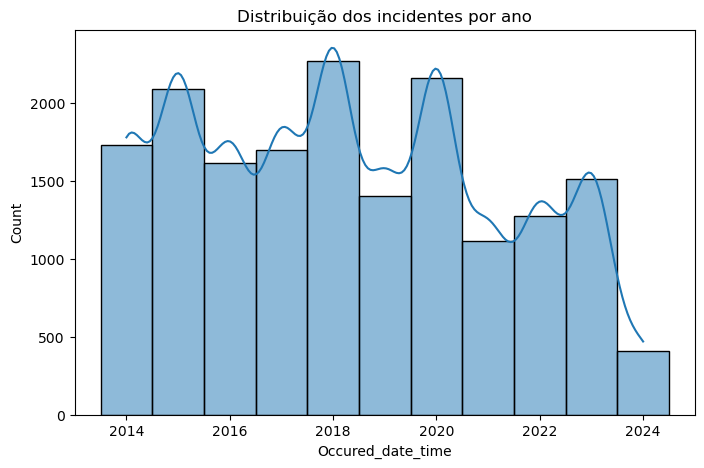

In [ ]:

plt.figure(figsize=(8,5))
plt.title('Distribuição dos incidentes por ano')
sns.histplot(df, x=df['Occured_date_time'].dt.year, discrete=True, kde=True);
plt.xlim(2013,2024+1)
plt.show()

c:\Users\joaop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


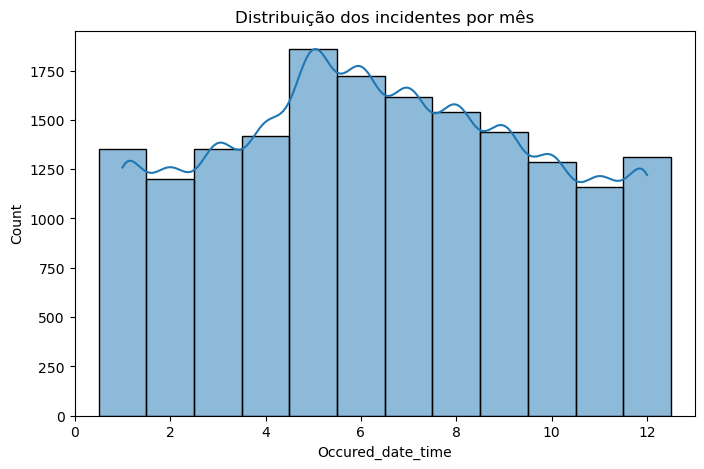

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Distribuição dos incidentes por mês')
sns.histplot(df, x=df['Occured_date_time'].dt.month, kde=True, discrete=True);
plt.xlim(0,12+1)
plt.show()

Buscamos compreender em que regiões da comtém uma maior incidência.

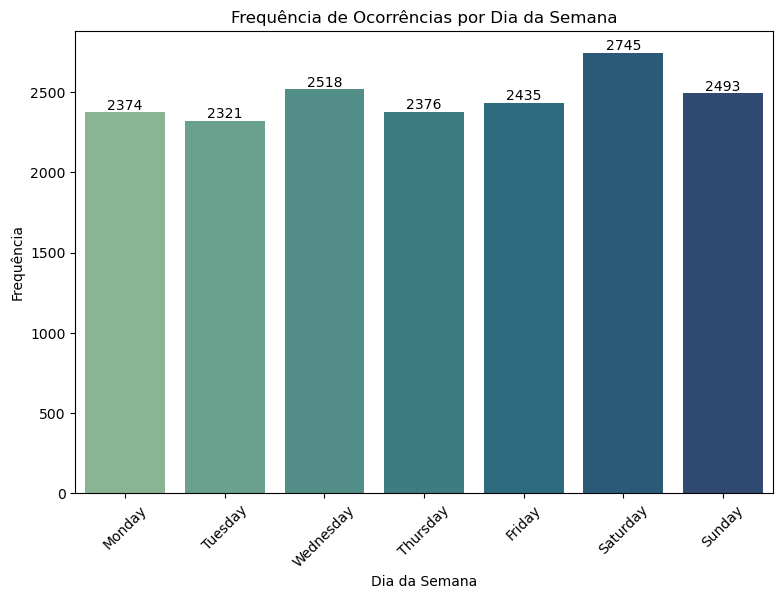

In [ ]:
df['day_of_week'] = df['Occured_date_time'].dt.day_name()

day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0).reset_index()
day_counts.columns = ['day_of_week', 'count']

plt.figure(figsize=(9, 6))
ax =sns.barplot(data=day_counts, x='day_of_week', y='count', palette="crest",estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Frequência de Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

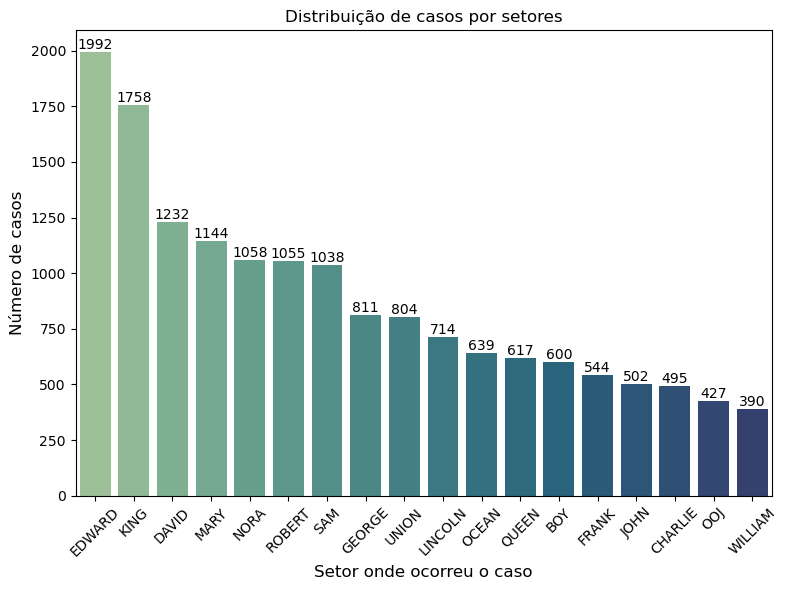

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

qnt_sector = df['Sector'].value_counts()
qnt_sector = pd.DataFrame(qnt_sector)

plt.xticks(rotation=45)

sns.barplot(x=qnt_sector.index, y=qnt_sector['count'], palette="crest", ax=ax, data=qnt_sector)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Distribuição de casos por setores")
ax.set_ylabel("Número de casos",fontdict={'fontsize':12})
ax.set_xlabel("Setor onde ocorreu o caso", fontdict={'fontsize':12})


fig.tight_layout();

##### Retirar os dados sujos e faltantes

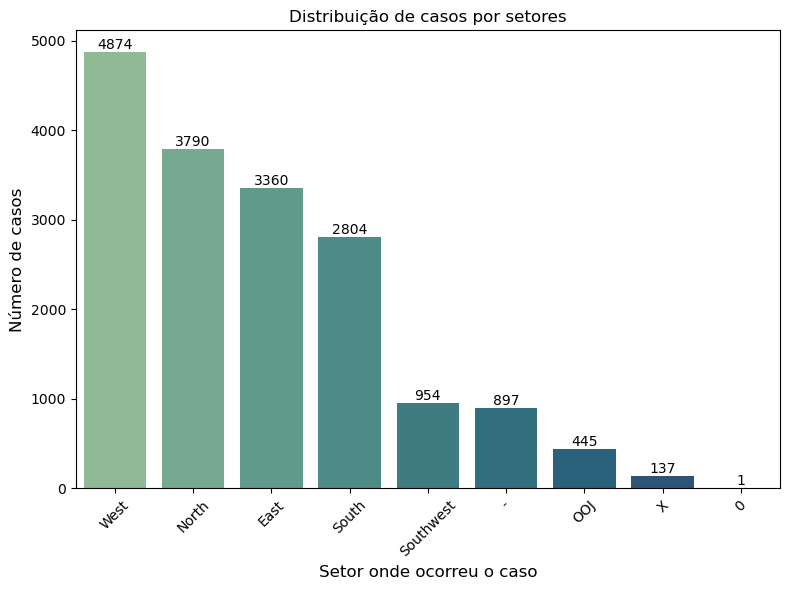

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

qnt_prec = df['Precinct'].value_counts()
qnt_prec = pd.DataFrame(qnt_prec)

plt.xticks(rotation=45)

sns.barplot(x=qnt_prec.index, y=qnt_prec['count'], palette="crest", ax=ax, data=qnt_prec)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Distribuição de casos por setores")
ax.set_ylabel("Número de casos",fontdict={'fontsize':12})
ax.set_xlabel("Setor onde ocorreu o caso", fontdict={'fontsize':12})


fig.tight_layout();

In [ ]:
qnt_precinct = df['Precinct'].value_counts()
qnt_precinct

Precinct
West         4874
North        3790
East         3360
South        2804
Southwest     954
-             897
OOJ           445
X             137
0               1
Name: count, dtype: int64

In [ ]:
qnt_precinct.head()

Precinct
West         4874
North        3790
East         3360
South        2804
Southwest     954
Name: count, dtype: int64

## Investigação demográfica

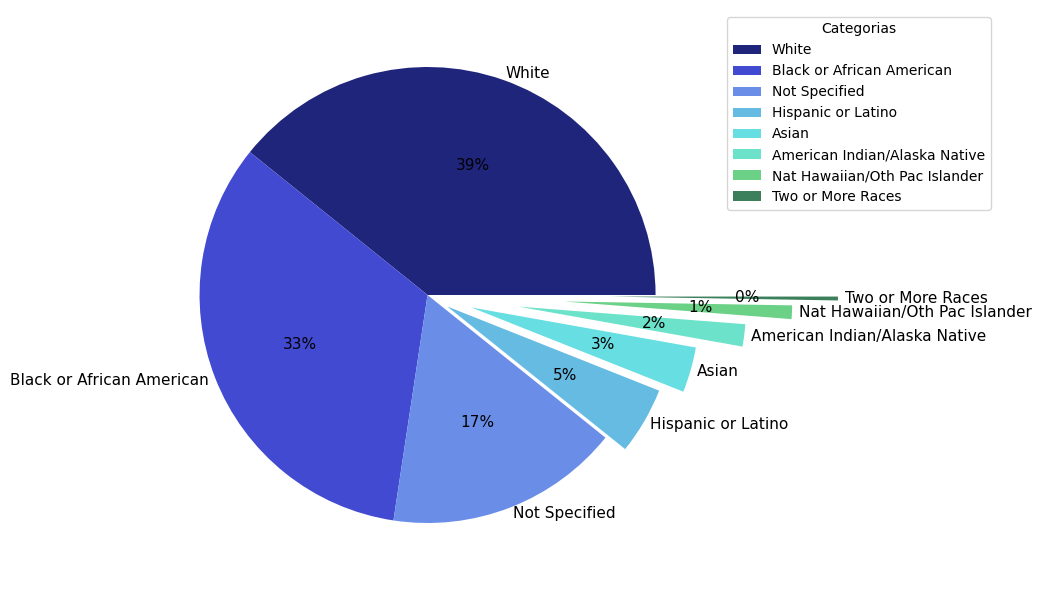

In [ ]:
qnt_race = df['Subject_Race'].value_counts()
plt.figure(figsize=(10,6))

plt.pie(qnt_race.values, labels=qnt_race.index,colors = ["#20257c", 
        "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", 
        "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.03, autopct = '%1.0f%%',
        explode = [0, 0, 0, .1, .2, .4, .6, .8], 
        textprops = {"fontsize": 11}, 
        )
plt.legend(qnt_race.index, title="Categorias", bbox_to_anchor=(1.5, 1.0), fontsize=10)
plt.tight_layout()
plt.show()

ValueError: 'explode' must be of length 'x'

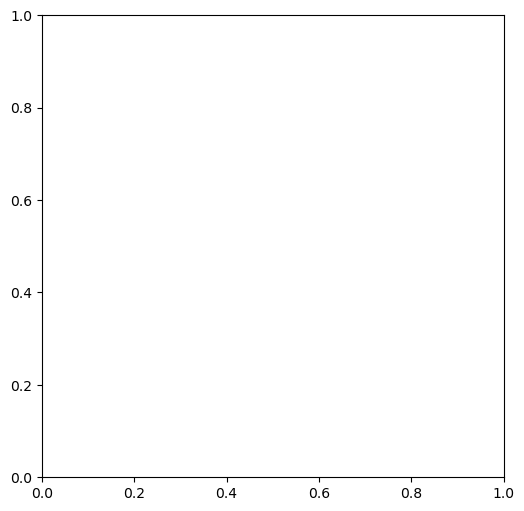

In [ ]:
qnt_gender = df['Subject_Gender'].value_counts()
plt.figure(figsize=(10,6))

plt.pie(qnt_gender.values, labels=qnt_gender.index,colors = ["#20257c", 
        "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", 
        "#6ce2cb", "#6ad187", "#3b7f5b", "#3b7f5c"],
        labeldistance = 1.03, autopct = '%1.0f%%',
        explode = [ 0, 0, .1, .2, .4, .6, .8, .10], 
        textprops = {"fontsize": 11}, 
        )
plt.legend(qnt_race.index, title="Categorias", bbox_to_anchor=(1.5, 1.0), fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
qnt_race = df[''].value_counts()
plt.figure(figsize=(10,6))

plt.pie(qnt_race.values, labels=qnt_race.index,colors = ["#20257c", 
        "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", 
        "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.03, autopct = '%1.0f%%',
        explode = [0, 0, 0, .1, .2, .4, .6, .8], 
        textprops = {"fontsize": 11}, 
        )
plt.legend(qnt_race.index, title="Categorias", bbox_to_anchor=(1.5, 1.0), fontsize=10)
plt.tight_layout()
plt.show()